In [51]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

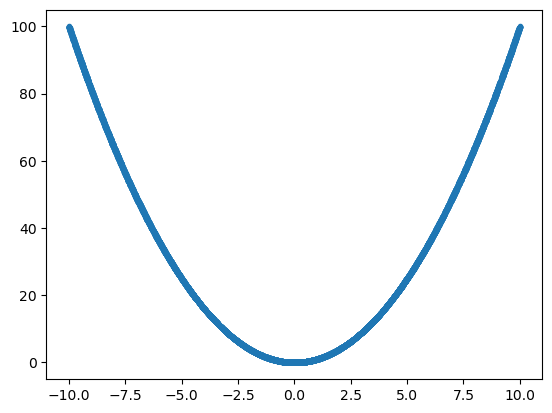

In [63]:
x = np.random.uniform(-10, 10, 10000)
y = x**2 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
plt.plot(x, y, ".")

In [65]:
inputs = Input(shape=(1,))
x_dense = Dense(64, activation='relu')(inputs)  # first hidden layer
x_dense = Dense(64, activation='relu')(x_dense)  # second hidden layer
outputs = Dense(1)(x_dense)  # output layer for regression


model = Model(inputs= inputs, outputs= outputs) 

model.compile(optimizer= 'adam', loss = 'mse')
model.fit(x_train, y_train, epochs= 100, batch_size=32, validation_split=0.1)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1233.5884 - val_loss: 135.1970
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - loss: 128.2350 - val_loss: 91.2825
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - loss: 83.6713 - val_loss: 51.0245
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step - loss: 46.1836 - val_loss: 23.8108
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 20.7270 - val_loss: 10.0597
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 9.2304 - val_loss: 5.2495
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - loss: 4.4013 - val_loss: 2.6687
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - loss: 2.2750 - val_loss: 1.4487
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 1.3848 - val_loss: 0.9564
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 943us/step - loss: 0.8584 - val_loss: 0.5876
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - loss: 0.5492 - val_loss: 0.4397
Epoch 1

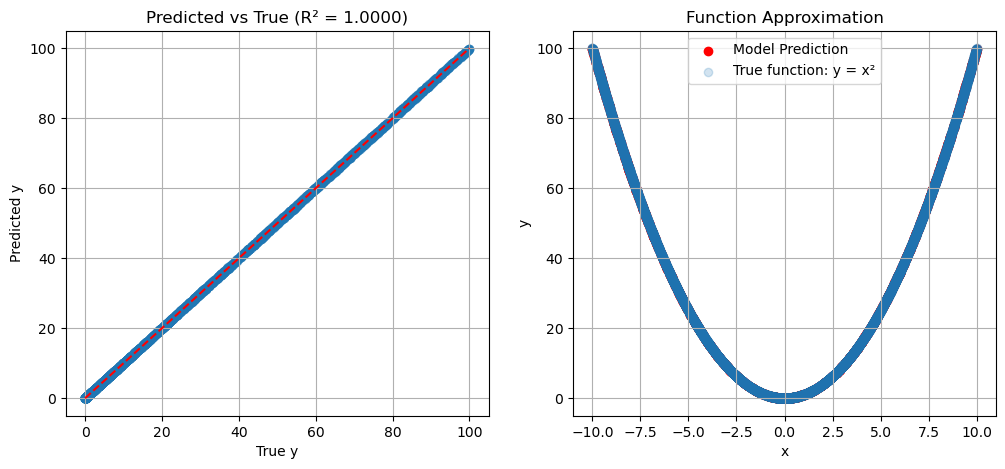

In [66]:
plt.figure(figsize=(12, 5))
# R2 Scatter Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred.flatten(), alpha=0.5)  # flatten the predictions
plt.plot([0, 100], [0, 100], 'r--')
plt.title(f"Predicted vs True (R² = {r2:.4f})")
plt.xlabel("True y")
plt.ylabel("Predicted y")
plt.grid(True)


plt.subplot(1, 2, 2)
plt.scatter(x_test, y_pred, color='red', label='Model Prediction')
plt.scatter(x, y , alpha=0.2 , label='True function: y = x²')
plt.legend()
plt.title("Function Approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

In [61]:
x1 = np.random.uniform(-10, 10, 10000)
x2 = np.random.uniform(-10, 10, 10000)

y1 = x1 - x2
y2 = x1 + x2

X = np.column_stack((x1, x2))
Y = np.column_stack((y1, y2))

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

inputs = Input(shape=(2,))
x = Dense(2, activation='linear')(inputs)  # hidden layer

model = Model(inputs=inputs, outputs=x) 

model.compile(optimizer= 'adam', loss= 'mse')
model.fit(X_train, Y_train, epochs= 100, batch_size=32, validation_split=0.1) 
Y_pred = model.predict(X_test)
r2_y1 = r2_score(Y_test[:, 0], Y_pred[:, 0])
r2_y2 = r2_score(Y_test[:, 1], Y_pred[:, 1])

Epoch 1/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 179.2664 - val_loss: 153.3033
Epoch 2/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 145.9497 - val_loss: 120.6122
Epoch 3/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 114.2030 - val_loss: 93.5065
Epoch 4/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 87.7499 - val_loss: 71.3114
Epoch 5/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 66.5716 - val_loss: 53.5124
Epoch 6/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 50.6607 - val_loss: 39.3088
Epoch 7/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 35.9383 - val_loss: 28.2511
Epoch 8/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 747us/step - loss: 25.6826 - val_loss: 19.7769
Epoch 9/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 18.4721 - val_loss: 13.4541
Epoch 10/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 743us/step - loss: 12.2053 - val_loss: 8.8637
Epoch 11/100
225/225 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 8.0316 - val_loss: 5.61

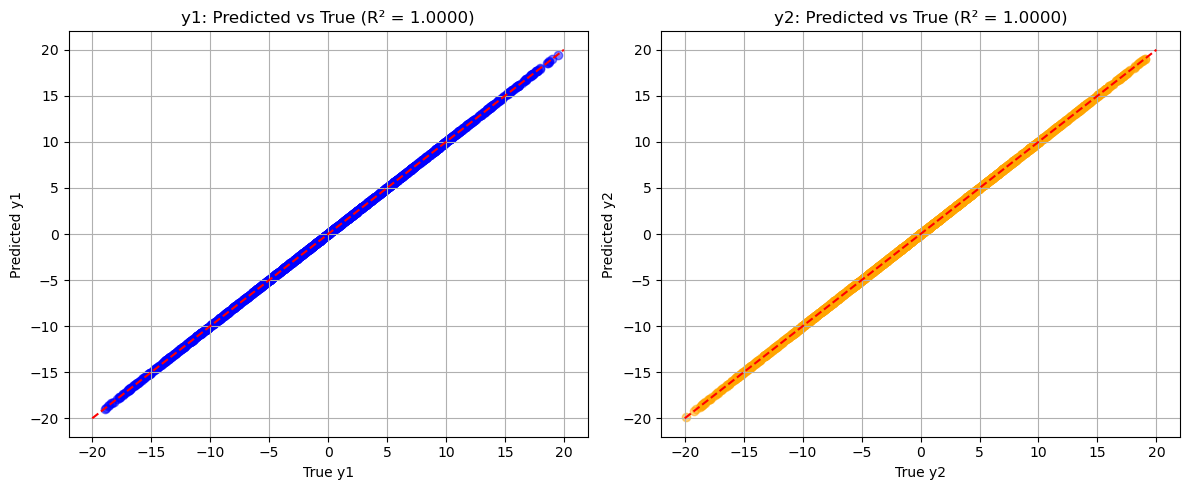

In [62]:
# R2 Scatter Plots (Separate)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(Y_test[:, 0], Y_pred[:, 0], alpha=0.5, color='blue')
plt.plot([-20, 20], [-20, 20], 'r--')
plt.title(f"y1: Predicted vs True (R² = {r2_y1:.4f})")
plt.xlabel("True y1")
plt.ylabel("Predicted y1")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(Y_test[:, 1], Y_pred[:, 1], alpha=0.5, color='orange')
plt.plot([-20, 20], [-20, 20], 'r--')
plt.title(f"y2: Predicted vs True (R² = {r2_y2:.4f})")
plt.xlabel("True y2")
plt.ylabel("Predicted y2")
plt.grid(True)

plt.tight_layout()
plt.show()